In [2]:
train_dir = r"C:\Users\R\Downloads\images\train"
validation_dir = r"C:\Users\R\Downloads\images\val"

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

In [4]:
train_generator = train_datagen.flow_from_directory(
    directory=train_dir, target_size=(150, 150), color_mode='rgb', class_mode='binary', batch_size=32, shuffle=True, 
    seed=2021)
validation_generator = test_datagen.flow_from_directory(
    directory=validation_dir, target_size=(150, 150), color_mode='rgb', class_mode='binary', batch_size=32, shuffle=True, 
    seed=2021)

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [6]:
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf

In [7]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dropout(0.1),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('Organic') 
    # and 1 for the other ('Recycled')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 512)               44859904  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                        

In [9]:
from tensorflow import keras
keras.utils.plot_model(model, "my_cnn_model.png")

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=1, mode='auto',restore_best_weights=True)
model.compile(optimizer='adam',loss='binary_crossentropy', metrics = ['accuracy'])

In [14]:
history = model.fit(train_generator, validation_data=validation_generator,epochs=50,
                              verbose=2, callbacks=[monitor])

Epoch 1/50
6/6 - 25s - loss: 4.9510 - accuracy: 0.6615 - val_loss: 0.6121 - val_accuracy: 0.7000 - 25s/epoch - 4s/step
Epoch 2/50
6/6 - 18s - loss: 0.9614 - accuracy: 0.7760 - val_loss: 1.4009 - val_accuracy: 0.5500 - 18s/epoch - 3s/step
Epoch 3/50
6/6 - 19s - loss: 0.4576 - accuracy: 0.8229 - val_loss: 0.5656 - val_accuracy: 0.7500 - 19s/epoch - 3s/step
Epoch 4/50
6/6 - 17s - loss: 0.3461 - accuracy: 0.8906 - val_loss: 0.2910 - val_accuracy: 0.8500 - 17s/epoch - 3s/step
Epoch 5/50
6/6 - 18s - loss: 0.1647 - accuracy: 0.9271 - val_loss: 0.5693 - val_accuracy: 0.7500 - 18s/epoch - 3s/step
Epoch 6/50
6/6 - 14s - loss: 0.0731 - accuracy: 0.9844 - val_loss: 0.2918 - val_accuracy: 0.9000 - 14s/epoch - 2s/step
Epoch 7/50
6/6 - 16s - loss: 0.0528 - accuracy: 0.9792 - val_loss: 0.2722 - val_accuracy: 0.9000 - 16s/epoch - 3s/step
Epoch 8/50
6/6 - 14s - loss: 0.0293 - accuracy: 0.9896 - val_loss: 0.3129 - val_accuracy: 0.8000 - 14s/epoch - 2s/step
Epoch 9/50
6/6 - 19s - loss: 0.0201 - accuracy: 

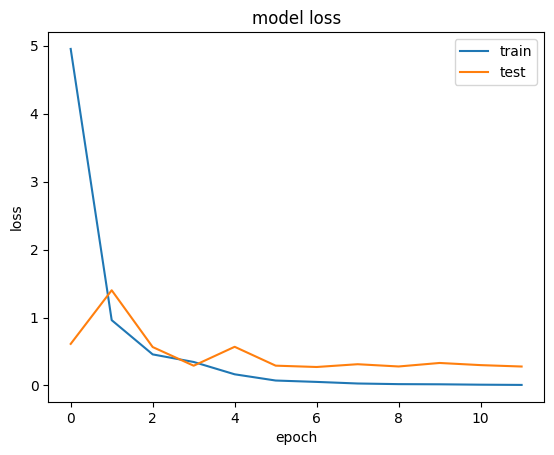

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [16]:
y_prob = model.predict(validation_generator,callbacks=[monitor])
y_pred = ["C" if probs > 0.5 else "M" for probs in y_prob]
y_pred

1/1 [==============================] - 1s 1s/step


['C',
 'C',
 'C',
 'M',
 'C',
 'C',
 'M',
 'M',
 'M',
 'C',
 'C',
 'M',
 'C',
 'C',
 'M',
 'C',
 'M',
 'M',
 'M',
 'M']